# Twitter Sentiment Analysis - Data Analysis

Once the whole preprocessing is done, we can finally try to analyze our data in order to extract some useful information that can be interesting or useful for the classification we will perform later.

First and foremost, we should import the packages that we will need for this task.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image # for opening, manipulating, and saving many different image file
import warnings
import numpy as np
import pandas as pd
from ast import literal_eval
import random
import nltk
warnings.filterwarnings('ignore')

## Wordcloud

We install now Wordcloud: it is a word cloud generator package for python.

Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s).

In [22]:
!pip install wordcloud

In [5]:
import wordcloud

In [24]:
!pip install gensim
import gensim

We move on by importing the preprocessed data that we obtained after running the preprocessing notebook.

In [2]:
df = pd.read_csv('preprocessed_data.csv', converters={"message": literal_eval})
df.head(20)

,sentiment,message,original_message,preprocessed_text
0,-1,"[climate, change, interest, hostel, global, wa...",@tiniebeany climate change is an interesting h...,climate change interest hostel global warm pla...
1,1,"[watch, beforetheflood, right, travel, world, ...",RT @NatGeoChannel: Watch #BeforeTheFlood right...,watch beforetheflood right travel world tackle...
2,1,"[fabulous, leonardo, decaprio, film, climate, ...",Fabulous! Leonardo #DiCaprio's film on #climat...,fabulous leonardo decaprio film climate change...
3,1,"[watch, amaze, documentary, leonardodicaprio, ...",RT @Mick_Fanning: Just watched this amazing do...,watch amaze documentary leonardodicaprio clima...
4,1,"[beforetheflood, watch, beforetheflood, right,...",#BeforeTheFlood Watch #BeforeTheFlood right he...,beforetheflood watch beforetheflood right trav...
5,1,"[vital, public, health, community, address, cl...",RT @DrDeJarnett: It's vital that the public he...,vital public health community address climate ...
6,1,"[bangladesh, not, cause, climate, change, coun...","Bangladesh did not cause climate change, so th...",bangladesh not cause climate change country no...
7,1,"[now, time, need, strong, ft, ), work, hardest...",Now's the time: we need a strong #FTT that wor...,now time need strong ft ) work hardest hit cli...
8,1,"[problem, global, reason, continue, resist, il...",RT @littoralsociety: The problem with global w...,problem global reason continue resist illustra...
9,1,"[one, easy, way, help, combat, climate, change...",RT @NatGeoChannel: One of the easiest ways to ...,one easy way help combat climate change daily ...


## Classes distribution in training set

We can start by performing an analysis of the classes distribution to see how many patterns from each class we have in our dataset.
In case of unbalanced dataset we must handle this in some way when performing classification.

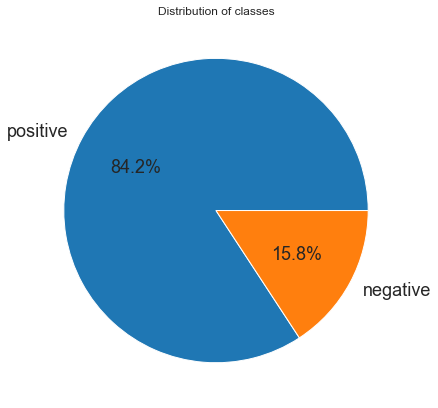

In [6]:
pos_class = df[df.sentiment == 1].shape[0]
neg_class = df[df.sentiment == -1].shape[0]

fig, ax = plt.subplots(figsize=(10,7))
ax.pie([pos_class, neg_class], labels=['positive','negative'], autopct='%1.1f%%', textprops={'fontsize': 18})
plt.title('Distribution of classes')

plt.savefig('pie_chart_distr.png')
plt.show()

We can see that our dataset has imbalanced classes.
If we don't handle this when performing the classification we would have a model that is highly biased towards the positive class.
Think for example of a model that always predicts the positive class: over this dataset it would have an 84% accuracy (But the model didn't learn anything!)

## Visualization of data in WordCloud

We want now to visualize the data by means of the WordCloud package.

In order to use WordCloud we need first to generate a long string containing all the words present in the dataset and then we will show them in the chart.

In [ ]:
# Merging all lists in every column as a unique string
df['message_string'] = [' '.join(x) for x in df['message']]
# Converting the columns into lists of sentences and then merging all sentences together in a long string
message_string_list = df['message_string'].tolist()
message_string = " ".join(message_string_list)

Once we have the data in the correct format, we can move on with the generation of the Wordcloud.
I will use the 'twitter.png' image to give also a themed shape to our chart.

The following function will generate 3 wordclouds:
- blue one: contains all the words
- green one: contains the words only from the tweets with positive class
- red one: contains the words ony from the tweets with negative class

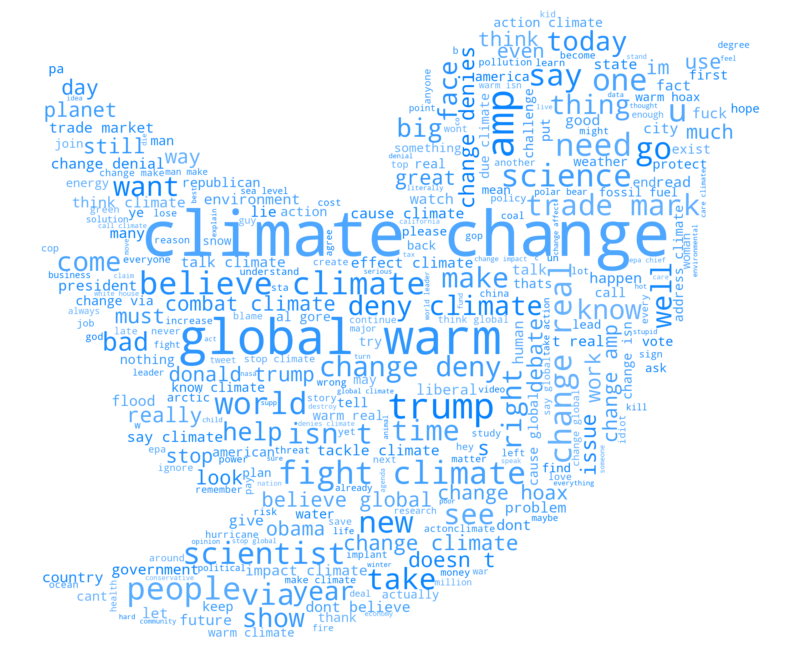

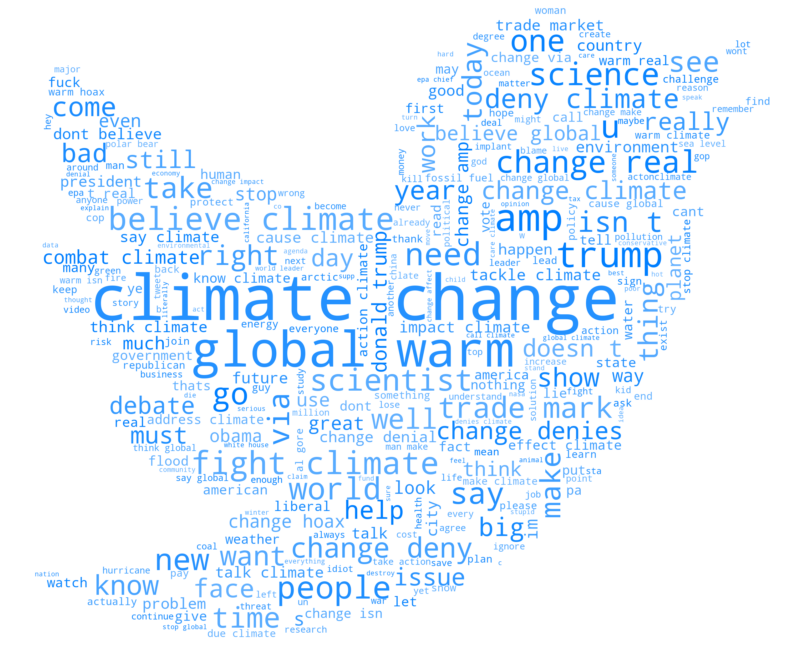

In [9]:
image = np.array(Image.open('twitter.png'))

def wordcloud_data(df, filename, color):
    def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
        return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

    def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
        return "hsl(100, 100%%, %d%%)" % random.randint(50, 70)

    def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
        return "hsl(330, 100%%, %d%%)" % random.randint(50, 70)

    if color == 'blue':
        contour_color = 'light_blue'
        func = blue_color_func
    elif color == 'green':
        contour_color = 'light_green'
        func = green_color_func
    else:
        contour_color = 'red'
        func = red_color_func

    wc = wordcloud.WordCloud(background_color='white',max_words=300, normalize_plurals=True,contour_color=contour_color, mask=image, relative_scaling=0.3).generate(message_string)
    fig = plt.figure()
    fig.set_figwidth(14) # set width
    fig.set_figheight(18) # set height

    plt.imshow(wc.recolor(color_func=func, random_state=3), interpolation='bilinear')
    plt.axis('off')
    plt.show()

    wc.to_file(filename)

    return message_string

message_string = wordcloud_data(df, 'wordcloud.png', 'blue')

We also want to see which are the words which are mainly associated to positive feelings and the ones associated to negative ones

### Positive words

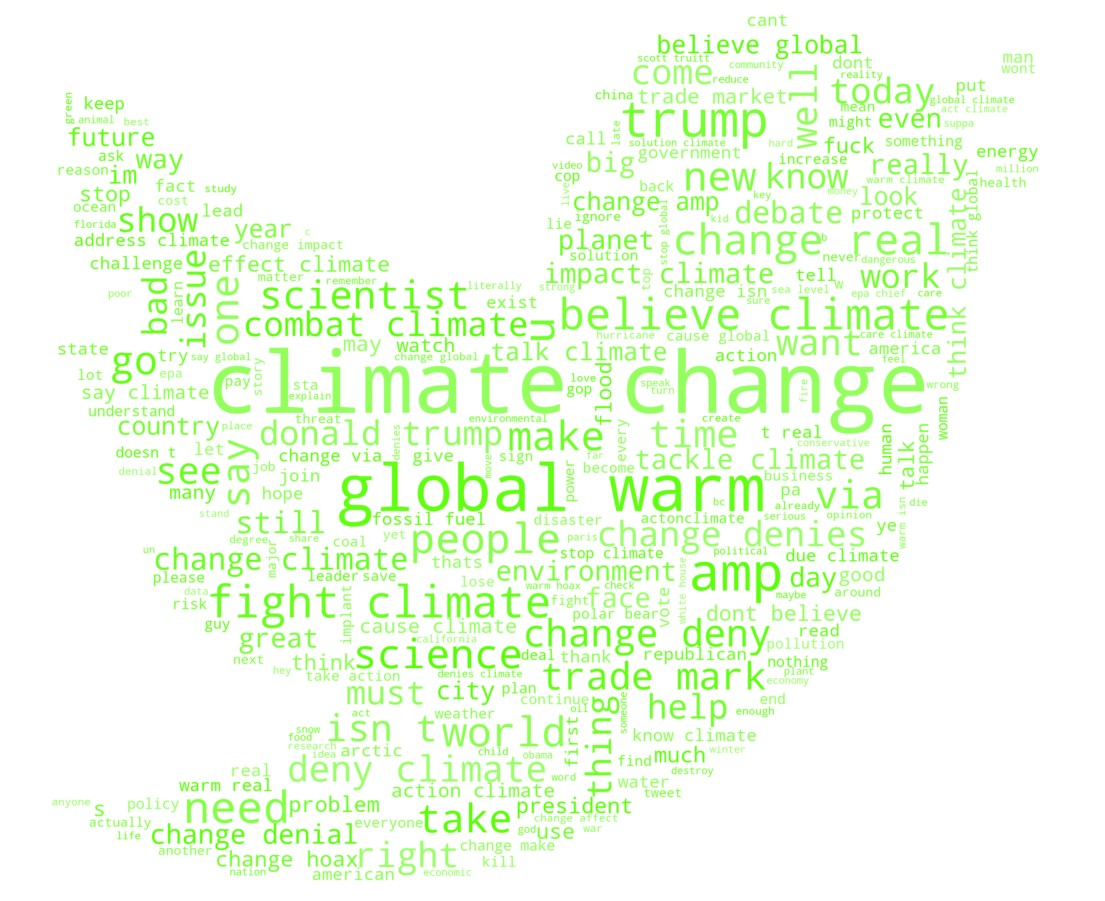

In [28]:
df_pos = df[df.sentiment == 1]
pos_data = wordcloud_data(df_pos, 'positive_wordcloud.png' ,'green')

### Negative words

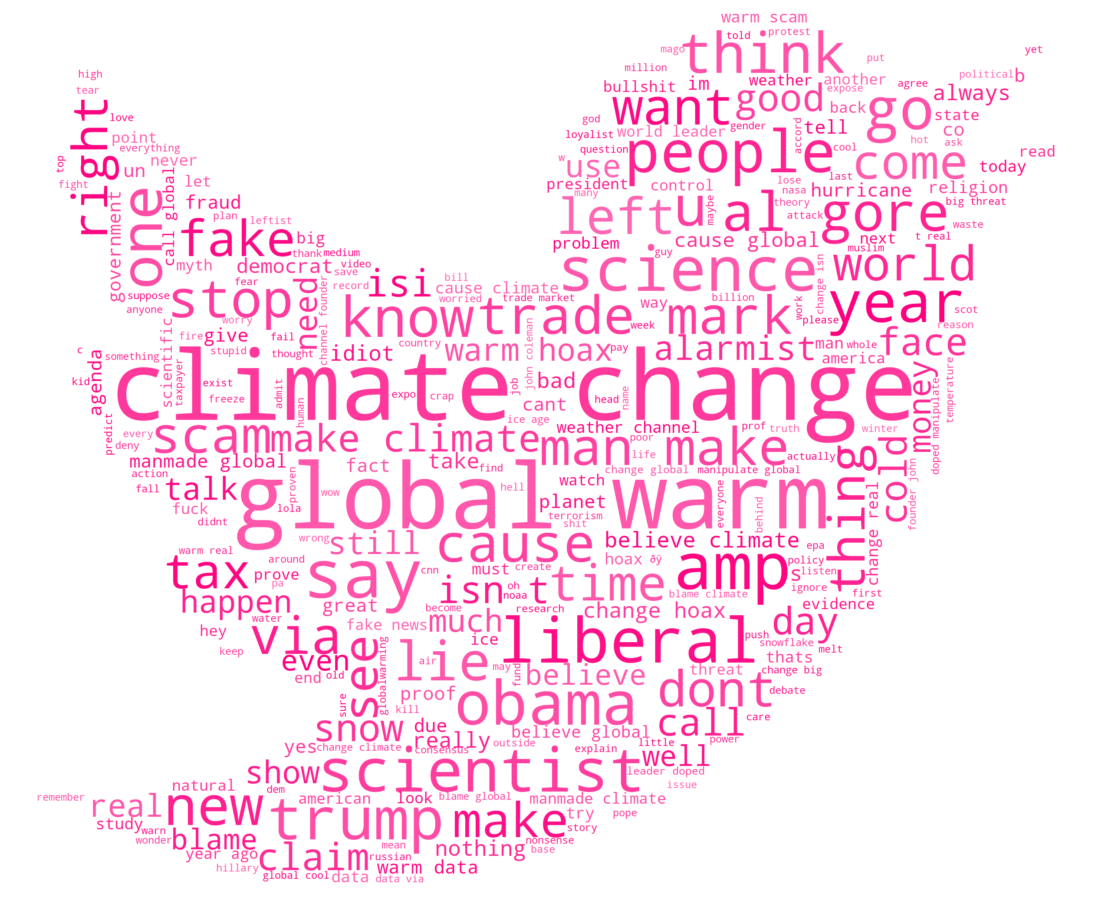

In [29]:
df_pos = df[df.sentiment == -1]
neg_data = wordcloud_data(df_pos, 'negative_wordcloud.png' ,'red')

Besides this nice representation, we could also use some histograms to see what actually are the most frequent words in the dataset along with the respective counts.

In order to do so, we can use the FreqDist class provided in the nltk package which returns a dictionary containing the counts (values) for each word (keys).

In [8]:
# Creating a dictionary with the counts for every word present in the list of words of the whole dataset
word_freq = nltk.FreqDist(message_string.split())
# Creating a pandas dataframe with the association of words and their respective counts
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(20)

,Word,Count
0,climate,19996
1,change,19380
4,global,5751
5,warm,5385
35,not,2493
177,trump,2016
1358,…,1756
241,amp,1723
99,believe,1382
118,real,1327


Once the counts have been collected and inserted in a dataframe column, we can plot the histogram with the 20 most frequent words

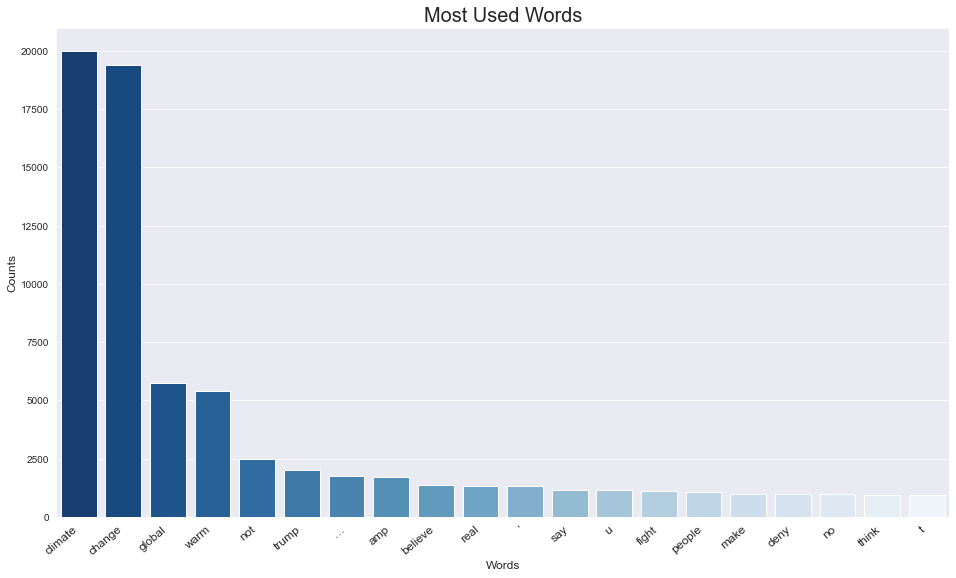

In [10]:
# Once that we have the counts, we pick the 20 largest elements
freq_df = freq_df.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,9))
palette = sns.color_palette("Blues")
ax = sns.barplot(data=freq_df, x= "Word", y = "Count", palette='Blues_r')
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('Words', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Most Used Words", fontsize=20)

plt.savefig('most_used_words.png', transparent=True)
plt.show()



As we can see climate change and global warming are on top of the list since we extracted the dataset by looking at these words.

However, one interesting piece of information can be noticed: the word "trump" is immediately after the aforementioned words.
Therefore, we can notice the relevance of Trump (the former president of the US) in this topic among the people posting on Twitter.

## Length of tweets

It usually said that people with negative sentiment post longer messages than people with a positive one. So we will try to compare the length of the tweets between the 2 classes to see if this is true also in our case.

In order to do this, we will use a boxplot.

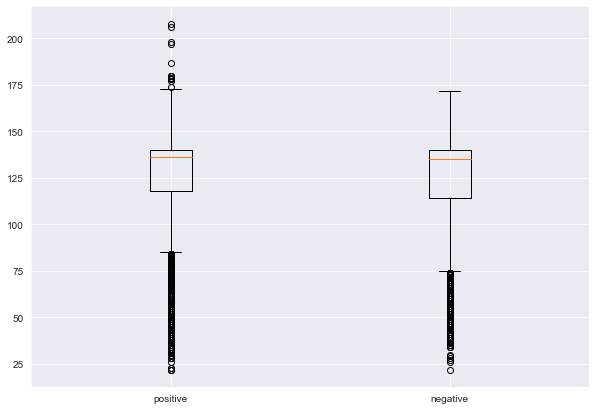

In [11]:
df['length'] = df['original_message'].apply(lambda x: len(x))
dict = {'positive': df['length'][df['sentiment'] == 1], 'negative': df['length'][df['sentiment'] == -1]}

fig = plt.figure(figsize=(10, 7))


plt.boxplot(dict.values(), labels=dict.keys())
plt.savefig('boxplot_length_words.png', transparent=True)
plt.show()

It can be easily observed that there is not much correlation between the class of the message and its length.
This may be due to the fixed maximum length of tweets.